In [1]:
print("hello")


hello


entity (Artifact config, Config config) , constants --> Data Ingestion -->  Artifact   

In [5]:
!pip install torchsummary

In [9]:
!pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [57]:
import os
import numpy as np
#import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from IPython.display import display

In [58]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F # Fr creating function pipelline,, 2 types of pipelines, sequential and function. Here we create functional
from torchvision import datasets, transforms, models
from torch.optim.lr_scheduler import StepLR # LR is learning rate
from torchsummary import summary #summary of the entire model

In [13]:
from tqdm import tqdm #For showing progress bar

In [16]:
os.chdir('..\\artifacts\\09_12_2024_14_20_44\data_ingestion\data')

In [32]:
data_path = os.getcwd()

In [33]:
class_name = ['NORMAL', 'PNEUMONIA']

In [34]:
# Creating a function to  get the list of files
def get_list_of_files(dir_name):
    '''
    input - The input directory location
    output - Returns the list the files in the directory
    '''
    files_list = os.listdir(dir_name)
    return files_list


In [35]:
train_data_path = data_path + '/train/' + class_name[0]

In [40]:
print ("train_data_path=",train_data_path)

train_data_path= c:\Users\ravib\deep_learning\artifacts\09_12_2024_14_20_44\data_ingestion\data/train/NORMAL


In [36]:
files_list_normal_train = get_list_of_files(train_data_path)

In [39]:
print ("files_list_normal_train=",files_list_normal_train)

files_list_normal_train= ['IM-0001-0001.jpeg', 'IM-0003-0001.jpeg', 'IM-0005-0001.jpeg', 'IM-0006-0001.jpeg', 'IM-0007-0001.jpeg', 'IM-0009-0001.jpeg', 'IM-0010-0001.jpeg', 'IM-0011-0001-0001.jpeg', 'IM-0011-0001-0002.jpeg', 'IM-0011-0001.jpeg', 'IM-0013-0001.jpeg', 'IM-0015-0001.jpeg', 'IM-0016-0001.jpeg', 'IM-0017-0001.jpeg', 'IM-0019-0001.jpeg', 'IM-0021-0001.jpeg', 'IM-0022-0001.jpeg', 'IM-0023-0001.jpeg', 'IM-0025-0001.jpeg', 'IM-0027-0001.jpeg', 'IM-0028-0001.jpeg', 'IM-0029-0001.jpeg', 'IM-0030-0001.jpeg', 'IM-0031-0001.jpeg', 'IM-0033-0001-0001.jpeg', 'IM-0033-0001-0002.jpeg', 'IM-0033-0001.jpeg', 'IM-0035-0001.jpeg', 'IM-0036-0001.jpeg', 'IM-0037-0001.jpeg', 'IM-0039-0001.jpeg', 'IM-0041-0001.jpeg', 'IM-0043-0001.jpeg', 'IM-0045-0001.jpeg', 'IM-0046-0001.jpeg', 'IM-0049-0001.jpeg', 'IM-0050-0001.jpeg', 'IM-0059-0001.jpeg', 'IM-0061-0001.jpeg', 'IM-0063-0001.jpeg', 'IM-0065-0001.jpeg', 'IM-0067-0001.jpeg', 'IM-0069-0001.jpeg', 'IM-0070-0001.jpeg', 'IM-0071-0001.jpeg', 'IM-0073-

In [43]:
pneumonia_train_data_path = data_path + '/train/' + class_name[1]

In [44]:
files_list_pneumonia_train = get_list_of_files(pneumonia_train_data_path)

In [45]:
files_list_pneumonia_test = get_list_of_files(data_path + '/test/' + class_name[1])
files_list_normal_test = get_list_of_files(data_path + '/test/' + class_name[0])

In [52]:
print("Number of train samples in Normal category {}".format(len(files_list_normal_train)))
print(f"Number of train samples in Pneumonia category= {len(files_list_pneumonia_train)}")
print(f"Number of test samples in Pneumonia category= {len(files_list_pneumonia_test)}")
print(f"Number of test samples in Pneumonia category= {len(files_list_pneumonia_test)}")

Number of train samples in Normal category 105
Number of train samples in Pneumonia category= 105
Number of test samples in Pneumonia category= 30
Number of test samples in Pneumonia category= 30


This is a binary classification method. One class with Normal data and other with Pneumonia

In [53]:
rand_img_no = np.random.randint(0,len(files_list_normal_train)) # Generate Random number between 0,105

In [54]:
rand_img_no

54

In [56]:
files_list_normal_train[:5]

['IM-0001-0001.jpeg',
 'IM-0003-0001.jpeg',
 'IM-0005-0001.jpeg',
 'IM-0006-0001.jpeg',
 'IM-0007-0001.jpeg']

(1357, 1890)


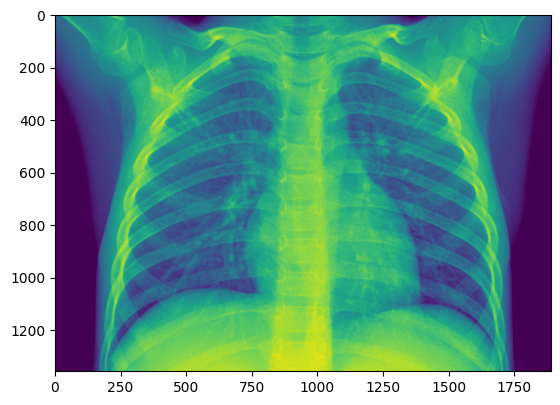

In [59]:
img = data_path + '/train/NORMAL/'+ files_list_normal_train[rand_img_no] # Get the image corresponding to rand img no
print(plt.imread(img).shape) #
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

(368, 728)


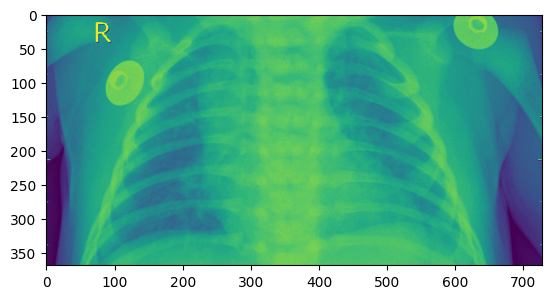

In [60]:
img = data_path + '/train/PNEUMONIA/'+ files_list_pneumonia_train[np.random.randint(0,len(files_list_pneumonia_train))]
print(plt.imread(img).shape)
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

(1384, 2022)


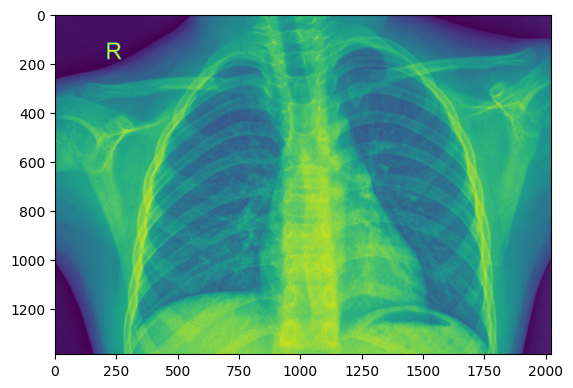

In [61]:
rand_img_no = np.random.randint(0,len(files_list_normal_test))
img = data_path + '/test/NORMAL/'+ files_list_normal_test[rand_img_no]
print(plt.imread(img).shape)
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

(584, 1216)


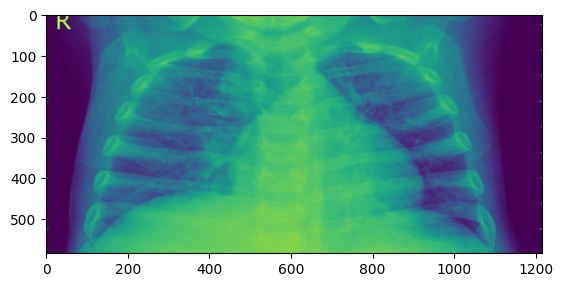

In [62]:
img = data_path + '/test/PNEUMONIA/'+ files_list_pneumonia_test[np.random.randint(0,len(files_list_pneumonia_test))]
print(plt.imread(img).shape)
img = mpimg.imread(img) # mpimg is making images in colorful mode
imgplot = plt.imshow(img)
plt.show()

Now that we have seen the sample of the images let's transform the data now
We need to perform transformation on both train and test images
For Training data we need to perform the data augmentation also.
Data Augmentation is done to create synthetic data.
In Transformation we are doing Resize,CenterCrop,ColorJitter,RandomHorizontalFlip,RandomRotation,ToTensor and Normalize.

Resize:- Resize the input image to the given size.
CenterCrop:- Crops the given image at the center.
ColorJitter:- Randomly change the brightness, contrast, saturation and hue of an image.
RandomHorizontalFlip:- Horizontally flip the given image randomly with a given probability.
RandomRotation:- Rotate the image by angle.
ToTensor:- Convert numpy.ndarray to tensor.
Normalize:- Normalize a float tensor image with mean and standard deviation.

In [63]:
# We are performing Data Agumentation here

train_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
])

In [64]:
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
])

Creating Data Loader
For our usecase will be using the default data loader for Pytorch.
We will be creating 2 data loaders one for the training data and other for the test data.
batch size is a hyperparameter which we can tweak according to our need and system configuration.
We can provide Image shuffling True for training data and False for test data.
Pin memory is used to transfer the loaded dataset from CPU to GPU.

In [76]:
train_data = datasets.ImageFolder(os.path.join(data_path, 'train'), transform= train_transform)
test_data = datasets.ImageFolder(os.path.join(data_path, 'test'), transform= test_transform)

In [77]:
train_data

Dataset ImageFolder
    Number of datapoints: 210
    Root location: c:\Users\ravib\deep_learning\artifacts\09_12_2024_14_20_44\data_ingestion\data\train
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(224, 224))
               ColorJitter(brightness=(0.9, 1.1), contrast=(0.9, 1.1), saturation=(0.9, 1.1), hue=(-0.1, 0.1))
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [78]:
test_data

Dataset ImageFolder
    Number of datapoints: 60
    Root location: c:\Users\ravib\deep_learning\artifacts\09_12_2024_14_20_44\data_ingestion\data\test
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [79]:
train_loader = DataLoader(train_data,
                          batch_size= 2, shuffle= True, pin_memory= True) #Pin memory . Ok ok, so data stays in page/RAM for faster transfer to CUDA/GPU
#but not get transferred to the disk? If so, then we would need large amount of RAM memory? making the system very expensive 

In [80]:
test_loader = DataLoader(test_data,
                         batch_size= 2, shuffle= False, pin_memory= True)

In [81]:
train_loader

In [82]:
class_names = train_data.classes
print(class_names)
print(f'Number of train images: {len(train_data)}')
print(f'Number of test images: {len(test_data)}')

['NORMAL', 'PNEUMONIA']
Number of train images: 210
Number of test images: 60


Convolutional Nueral network Architecture 
First Layer is the input layer consisting of 3 input channels and output channels with kernel_size of 3X3, padding=0 and bias=True. The activation function we are using is ReLU and performing batch normalization.
Then we are performing max pooling to extract the important features out of the image.
Similarly we are passing our model through 9 convolutional layers.
Finally we are passing out passing our model through a output layer in which we are getting binary classification.

Image is a collection of pixcel --> extract feature/kernel --> Kernel (feature) : This step is called convolution

From the Kernel (feature or filter) --> we get important features of image. 

We pass image to activation function (Relu method)  - it converts all data to 0 - +n,, all negative values will be made as 0
Then we do max pooling ( we can do min pooling, avg pooling, pooling is not a learning parameter) to get dominant features from convoluted image
Then we do flattening which means converting to 1D array -> we pass this 1D array to Full connected nueral network.
From the FNN we get the Final output. We peform the loss method on the Output and we do back propogation for optimzation.

There are 2 type of learning parameters, 1, Kernel parameter and 2nd is full connected nn (learning parameter)
whenever we are running multiple EPOCHs, we keep optimizing the Kernel parameter. Kernel is a learning parameter and we determine local minima/Global minima and model will converge hence we get general model.

We load NET from Torch.

ReLU stands for Rectified Linear Unit :: This means that the ReLU function outputs the input value x if it's positive, and outputs 0 if it's negative.

Here we are creating a custom simple nueral network.

In [84]:

class Net(nn.Module):
    def __init__(self):
        """
        Creating custom CNN architecture for Image classification
        """
        super(Net, self).__init__()
        # Input Block
        # in channel = 3, correspondig to RGB
        # we get 8 output channels 
        # Kernel size is 3*3

        self.convolution_block1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=(3, 3),
                      padding=0, bias=True), 
            nn.ReLU(),
            nn.BatchNorm2d(8)
        )
        self.pooling11 = nn.MaxPool2d(2, 2)
        # CONVOLUTION BLOCK 1
        self.convolution_block2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=20, kernel_size=(3, 3),
                      padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(20)
        )
        self.pooling22 = nn.MaxPool2d(2, 2)
        self.convolution_block3 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=10, kernel_size=(1, 1), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(10),
        )
        self.pooling33 = nn.MaxPool2d(2, 2)
        # CONVOLUTION BLOCK 2
        self.convolution_block4 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=(3, 3), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(20)
        )
        self.convolution_block5 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=32, kernel_size=(1, 1), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(32),
        )
#         self.convblock6 = nn.Sequential(
#             nn.Conv2d(in_channels=32, out_channels=10, kernel_size=(1, 1), padding='same', bias=True),
#             nn.ReLU(),
#             nn.BatchNorm2d(10),
#         )
        self.convolution_block6 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=10, kernel_size=(3, 3), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(10)
        )
#         self.convblock8 = nn.Sequential(
#             nn.Conv2d(in_channels=10, out_channels=32, kernel_size=(1, 1), padding='same', bias=True),
#             nn.ReLU(),
#             nn.BatchNorm2d(32)
#         )
        self.convolution_block7 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(1, 1), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(10)
        )
        self.convolution_block8 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=14, kernel_size=(3, 3), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(14)
        )
        self.convolution_block9 = nn.Sequential(
            nn.Conv2d(in_channels=14, out_channels=16, kernel_size=(3, 3), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(16)
        )
        # OUTPUT BLOCK
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=4)
        )
        self.convolution_block_out = nn.Sequential(
              nn.Conv2d(in_channels=16, out_channels=2, kernel_size=(4, 4), padding=0, bias=True),
        )

    # Pass 1D layer of CNN to feed forward
    #     
    def forward(self, x):
        x = self.convolution_block1(x)
        x = self.pooling11(x)
        x = self.convolution_block2(x)
        x = self.pooling22(x)
        x = self.convolution_block3(x)
        x = self.pooling33(x)
        x = self.convolution_block4(x)
        x = self.convolution_block5(x)
#         x = self.convblock6(x)
        x = self.convolution_block6(x)
#         x = self.convblock8(x)
        x = self.convolution_block7(x)
        x = self.convolution_block8(x)
        x = self.convolution_block9(x)
        x = self.gap(x)
        x = self.convolution_block_out(x)
        x = x.view(-1, 2)
        return F.log_softmax(x, dim=-1)

In [85]:
# To check weather cuda is available in the system or not 
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Available processor {}".format(device))
model = Net().to(device)
# To check the model summary
summary(model, input_size=(3, 224, 224))

Available processor cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 8, 222, 222]             224
              ReLU-2          [-1, 8, 222, 222]               0
       BatchNorm2d-3          [-1, 8, 222, 222]              16
         MaxPool2d-4          [-1, 8, 111, 111]               0
            Conv2d-5         [-1, 20, 109, 109]           1,460
              ReLU-6         [-1, 20, 109, 109]               0
       BatchNorm2d-7         [-1, 20, 109, 109]              40
         MaxPool2d-8           [-1, 20, 54, 54]               0
            Conv2d-9           [-1, 10, 54, 54]             210
             ReLU-10           [-1, 10, 54, 54]               0
      BatchNorm2d-11           [-1, 10, 54, 54]              20
        MaxPool2d-12           [-1, 10, 27, 27]               0
           Conv2d-13           [-1, 20, 25, 25]           1,820
             Re

In [86]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

In [87]:
def train(model, device, train_loader, optimizer, epoch):
    """
    Description: To train the model 
    
    input: model,device,train_loader,optimizer,epoch 
    
    output: loss, batch id and accuracy
    """
    model.train()
    pbar = tqdm(train_loader)
    correct = 0
    processed = 0
    for batch_idx, (data, target) in enumerate(pbar):
        # get data
        data, target = data.to(device), target.to(device)
        # Initialization of gradient
        optimizer.zero_grad()
        # In PyTorch, gradient is accumulated over backprop and even though thats used in RNN generally not used in CNN
        # or specific requirements
        ## prediction on data
        y_pred = model(data)
        # Calculating loss given the prediction
        loss = F.nll_loss(y_pred, target)
        train_losses.append(loss)
        # Backprop
        loss.backward()
        optimizer.step()
        # get the index of the log-probability corresponding to the max value
        pred = y_pred.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        processed += len(data)
        pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
        train_acc.append(100*correct/processed)

In [88]:
def test(model, device, test_loader):
    """
    Description: To test the model
    
    input: model, device, test_loader
    
    output: average loss and accuracy
    
    """
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
    test_acc.append(100. * correct / len(test_loader.dataset))

In [89]:
# Defining the params for training 
model =  Net().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.8)
scheduler = StepLR(optimizer, step_size=6, gamma=0.5)
EPOCHS = 1

In [92]:
#Training the model
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    scheduler.step()
    print('current Learning Rate: ', optimizer.state_dict()["param_groups"][0]["lr"])
    test(model, device, test_loader)

EPOCH: 0


Loss=1.6939163208007812 Batch_id=104 Accuracy=67.14: 100%|██████████| 105/105 [00:12<00:00,  8.61it/s] 


current Learning Rate:  0.01

Test set: Average loss: 0.5709, Accuracy: 49/60 (81.67%)



Text(0.5, 1.0, 'Test Accuracy')

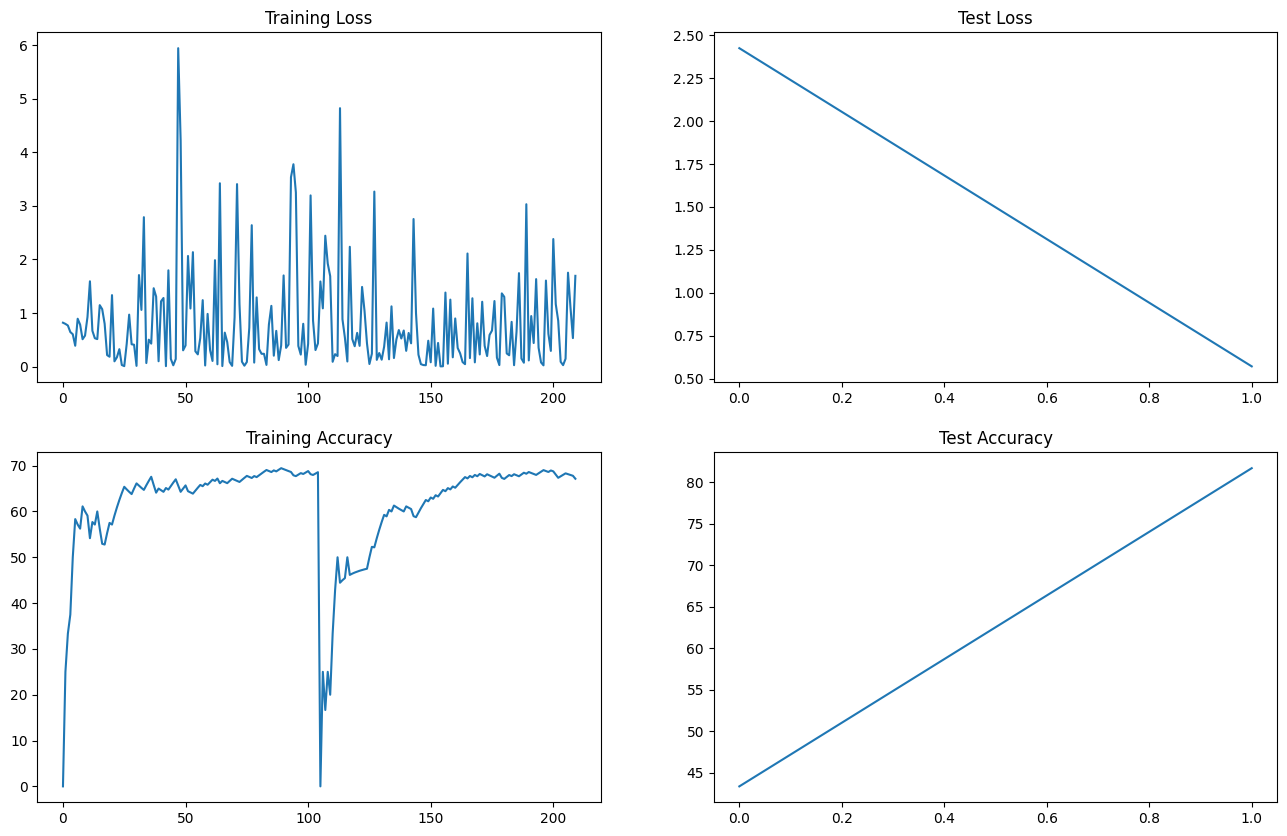

In [93]:
train_losses1 = [float(i.cpu().detach().numpy()) for i in train_losses]
train_acc1 = [i for i in train_acc]
test_losses1 = [i for i in test_losses]
test_acc1 = [i for i in test_acc]
fig, axs = plt.subplots(2,2,figsize=(16,10))
axs[0, 0].plot(train_losses1)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc1)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses1)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc1)
axs[1, 1].set_title("Test Accuracy")